In [ ]:
import sys
import sklearn
import matplotlib
import numpy
import pandas
import seaborn
import fix_yahoo_finance
import datetime

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Yahoo Finance: {}'.format(fix_yahoo_finance.__version__))

In [ ]:
#   Initial Date for the Data Collection
init_date = '2000-1-1'

[*********************100%***********************]  1 of 1 downloaded


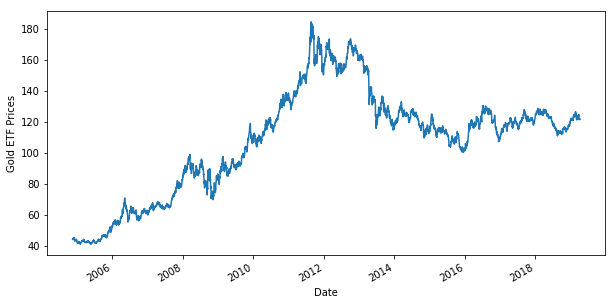

In [3]:
frame.Close.plot(figsize=(10,5))
plt.ylabel("Gold ETF Prices")
plt.show()

In [4]:
frame['S_3'] = frame['Close'].shift(1).rolling(window=3).mean()
frame['S_9'] = frame['Close'].shift(1).rolling(window=9).mean()

In [5]:
frame= frame.dropna()
X = frame[['S_3','S_9']]
X.head()

,S_3,S_9
Date,,
2004-12-02,45.300001,45.011111
2004-12-03,45.150000,45.074445
2004-12-06,45.310000,45.165556
2004-12-07,45.239999,45.190000
2004-12-08,45.293332,45.230000


In [6]:
#Define dependent variable
y = frame['Close']
y.head()

Date
2004-12-02    44.950001
2004-12-03    45.599998
2004-12-06    45.169998
2004-12-07    45.110001
2004-12-08    44.009998
Name: Close, dtype: float64

In [7]:
#Split the data into train and test dataset
t=.8
t = int(t*len(frame))

In [8]:
# Train dataset
X_train = X[:t]
y_train = y[:t]

In [9]:
# Test dataset
X_test = X[t:]
y_test = y[t:]

In [15]:
#Create a linear regression model
linear = LinearRegression().fit(X_train,y_train)
print ("Linear Regression equation")
print ("Gold ETF Price (y) =", \
round(linear.coef_[0],2), "* 3 Days Moving Average (x1)", \
round(linear.coef_[1],2), "* 9 Days Moving Average (x2) +", \
round(linear.intercept_,2), "(constant)")

Linear Regression equation
Gold ETF Price (y) = 1.2 * 3 Days Moving Average (x1) -0.2 * 9 Days Moving Average (x2) + 0.21 (constant)


In [22]:
#Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
print('Predicted Price : ',predicted_price[len(predicted_price)-1])
predicted_price = pd.DataFrame(predicted_price,index=X_test.index,columns = ['price'])

Predicted Price :  121.82580228744776


Text(0, 0.5, 'Gold ETF Price')

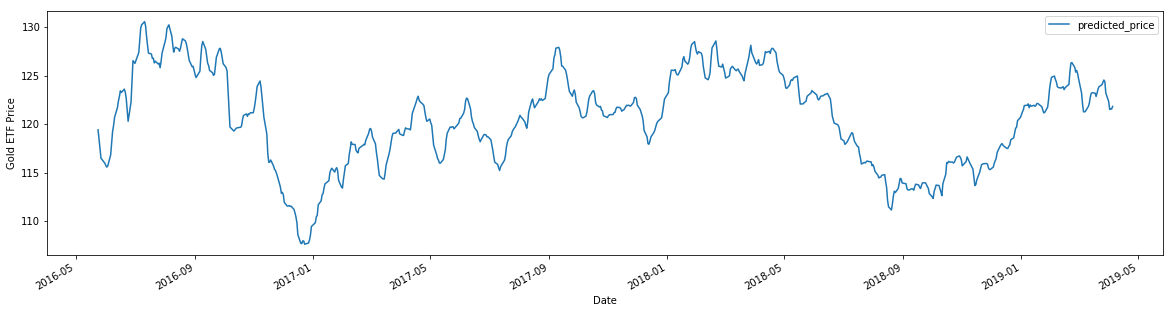

In [26]:
predicted_price.plot(figsize=(20,5))
# X_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Gold ETF Price")
# plt.show()

In [13]:
# R square
r2_score = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2_score))
print(r2_score)

95.51391296327145
